## Project Name : Wine Quality Classification

### Contribution : Individual

This project aims to develop a machine learning model that can classify types of wine based on certain attributes associated with each type of wine.This project also analyzes various factors that influence the quality of the wine itself.

In [73]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
# load the dataset
dataset = '/content/drive/MyDrive/Dataset CSV/WineQT.csv'

df = pd.read_csv(dataset)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**UNDERSTAND THE GIVEN VARIABLES**

1. **Fixed acidity:** The concentration of non-volatile acids present in the wine, usually dominated by tartaric acid. It is measured in grams per liter (g/L).

2. **Volatile acidity:** The concentration of volatile acids in the wine, primarily acetic acid, which can give wine a vinegar-like taste and aroma if present in high levels. It is also measured in grams per liter (g/L).

3. **Citric acid:** The concentration of citric acid present in the wine. Citric acid can impart a fresh, citrusy flavor to the wine. It is measured in grams per liter (g/L).

4. **Residual sugar:** The amount of sugar remaining in the wine after fermentation is complete, measured in grams per liter (g/L). It contributes to the wine's sweetness.

5. **Chlorides:** The concentration of chlorides in the wine, often associated with salty or salty-bitter flavors if present in high levels. It is measured in grams per liter (g/L).

6. **Free sulfur dioxide:** The concentration of sulfur dioxide (SO2) that is not bound to other molecules in the wine. Sulfur dioxide is commonly used as a preservative in winemaking to prevent oxidation and microbial spoilage. It is measured in parts per million (ppm).

7. **Total sulfur dioxide:** The total concentration of both free and bound sulfur dioxide in the wine. It is also measured in parts per million (ppm).

8. **Density:** The density of the wine, typically measured at a specific temperature, and can provide information about the wine's alcohol content and sugar content. It is often measured in grams per milliliter (g/mL).

9. **pH:** The measure of acidity or basicity of the wine on a scale from 0 to 14, with values less than 7 indicating acidity, 7 indicating neutrality, and values greater than 7 indicating basicity.

10. **Sulphates:** The concentration of sulfur dioxide salts (SO3^-2) in the wine. Sulphates can contribute to the wine's antioxidant properties and act as a preservative. It is measured in grams per liter (g/L).

11. **Alcohol:** The percentage of alcohol by volume (ABV) in the wine, which is a key indicator of the wine's strength and body.

12. **Quality:** A subjective score given to the wine based on sensory evaluation, typically ranging from 0 to 10, with higher scores indicating better quality. This column represents the target variable for classification or regression tasks.

## Data Preprocessing Part 1

In [75]:
# checking the shape of dataset
df.shape

(1143, 13)

In [76]:
# check detail information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Dropping column ID because it is an index column

In [77]:
# Drop Id col
df.drop(columns='Id', inplace=True)

In [78]:
# checking null value on dataset
df.isnull().sum() * 100 / len(df)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [79]:
# show the concise descriptive statistics of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [80]:
# checking for duplicated values
df.duplicated().sum()

125

so, we have 125 duplicated value, so i'm gonna check the duplicated data

In [81]:
duplicated_row = df[df.duplicated()]
print('Duplicated value: ')
duplicated_row

Duplicated value: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
46,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
64,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
65,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
71,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,7.5,0.380,0.57,2.30,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6
1113,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1114,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1116,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5


In [82]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [83]:
# do filtering on the target column
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
df.rename(columns={'quality': 'wine quality'}, inplace=True)

In [84]:
# Change space to _
df.columns = df.columns.str.replace(' ', '_')

In [85]:
df.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_quality
713,8.9,0.380,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6,1
260,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,1
258,12.5,0.460,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2,0
622,8.4,0.310,0.29,3.1,0.194,14.0,26.0,0.99536,3.22,0.78,12.0,1
564,10.0,0.560,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,1


**1 represents good quality and 0 represents bad quality**

## Eksploratory Data Analysis (EDA)

In the exploratory data analysis, I will be looking at the relationship between the target variable and the other variables. I will also be looking at the distribution of the variables across the dataset, in order to understand the data in a better way.

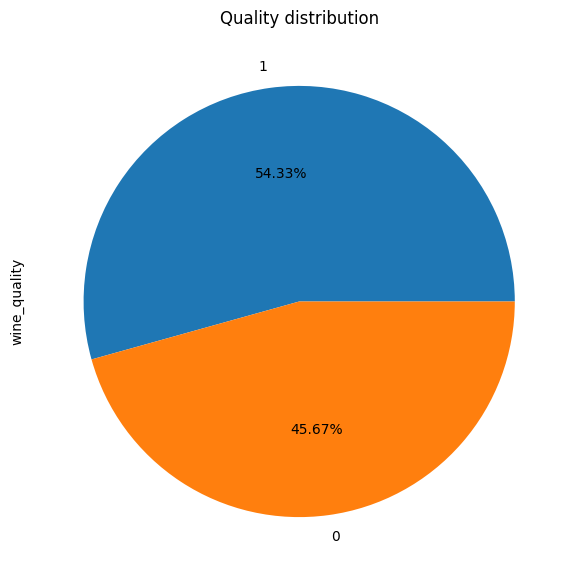

In [86]:
df['wine_quality'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(7,7))
plt.title('Quality distribution')
plt.show()

the dataset has the equal number of both good and bad quality, with percentages of 54.33% and 45.67% respectively.

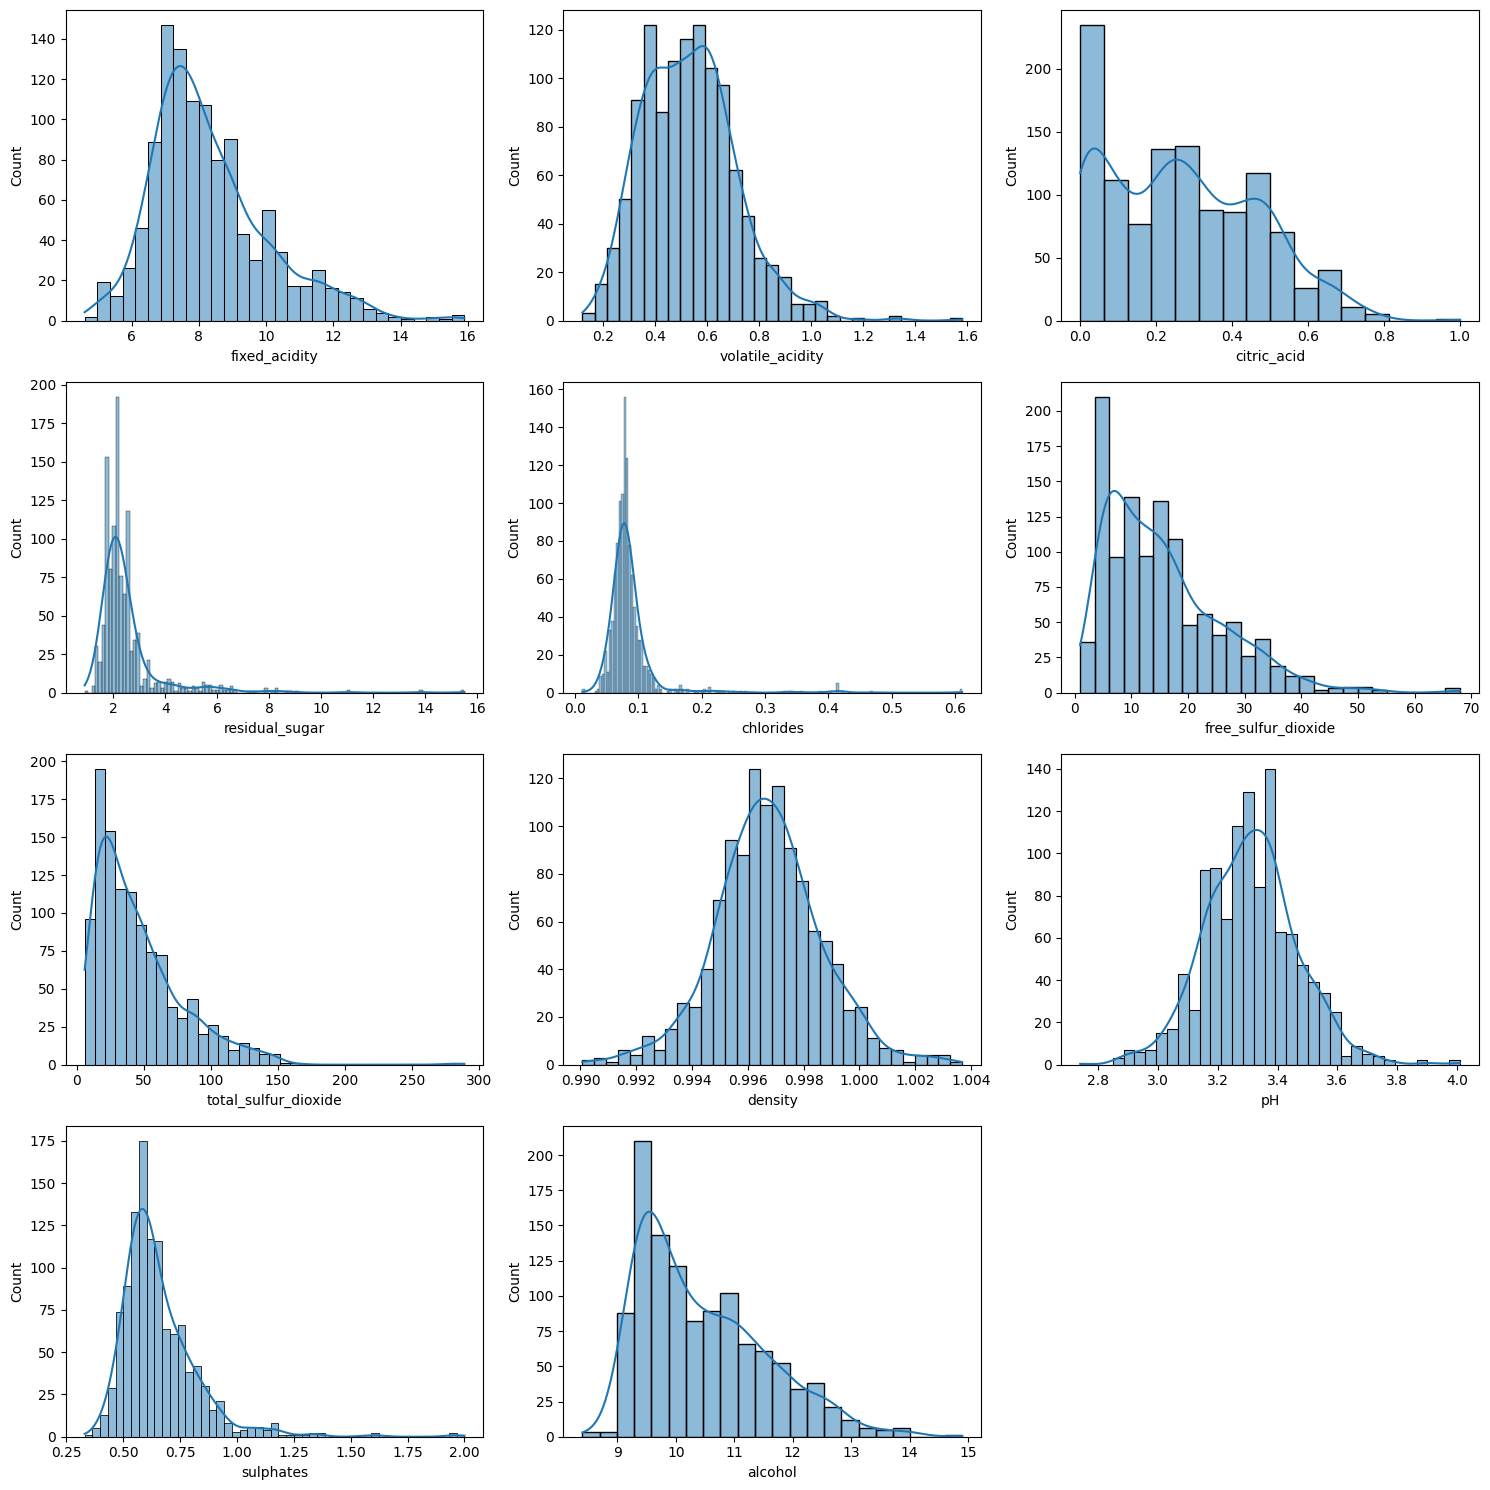

In [87]:
nums = df.drop(columns='wine_quality').columns

plt.figure(figsize=(15,15))
for i in range(0, len(nums)):
  plt.subplot(4, 3, i+1)
  sns.histplot(df[nums[i]], kde=True)
  plt.tight_layout()

From the plot above, you can see the distribution of each column which influences the quality of the wine itself

<Axes: >

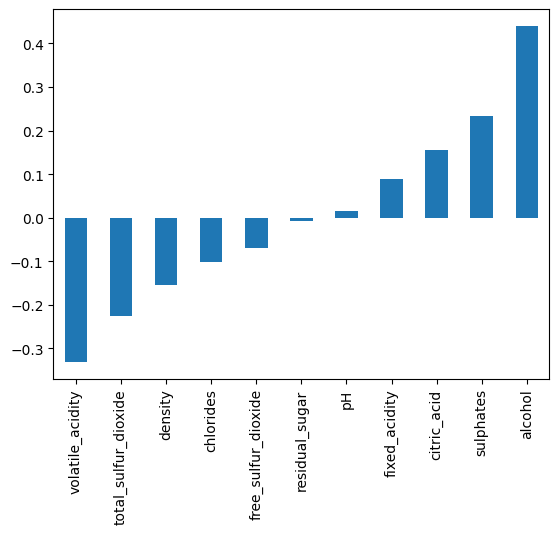

In [88]:
df.corr()['wine_quality'][:-1].sort_values().plot(kind='bar')

it can be seen that the alcohol column has a strong positive correlation and on the other hand the volatile acidity has a strong negative correlation indicating that wines with a lower volatile acid content tend to have a higher quality score.

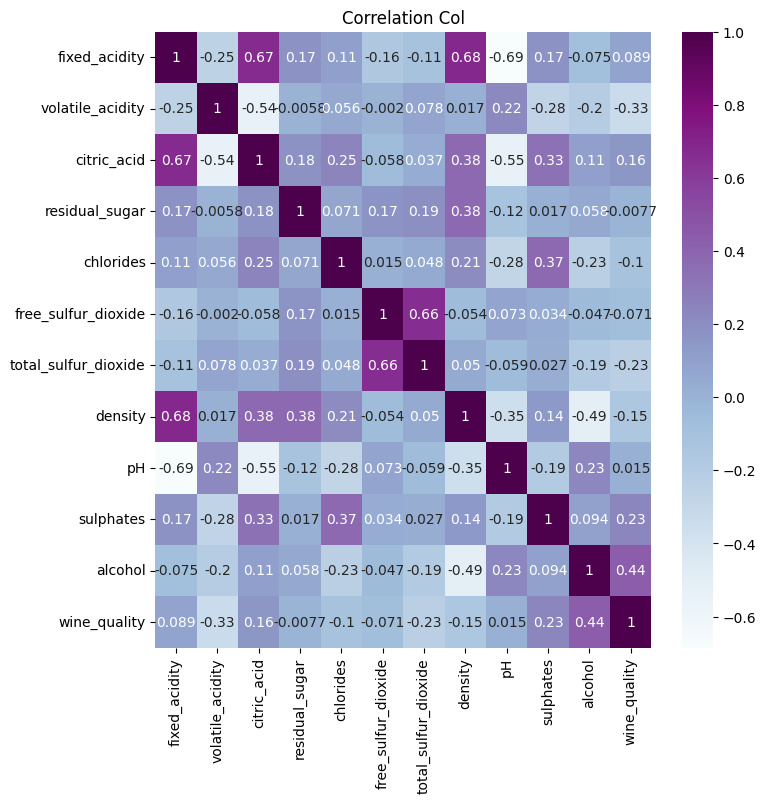

In [89]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.title('Correlation Col')
plt.show()

In the correlation matrix heatmap, we can see that there is positive correlation between alcohol and wine_quality.

## Train Test Split

In [90]:
X = df.drop('wine_quality', axis=1)
y = df['wine_quality']

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

I will be using the following models to predict the wine quality:

- Random Forest Classifier

- Decision Tree Classifier

- Logistic Regression

- K Nearest Neighbors

### Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [93]:
from sklearn.model_selection import GridSearchCV

# parameter grid
params = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

# GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# fitting the model
grid.fit(X_train, y_train)

# print the best parameter for knn
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


In [94]:
# Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=2, min_samples_split=8, random_state=0)

# Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=2,
                       min_samples_split=8, random_state=0)

In [95]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.9682713347921226


In [96]:
# predict the test set result
rfc_pred = rfc.predict(X_test)

### Decision Tree Clasifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

In [98]:
# Parameter grid
params = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

# GridSearchCV object
grid_dtc = GridSearchCV(dtc, param_grid=params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# fitting the model
grid_dtc.fit(X_train, y_train)

# print the best parameter for dtc
print('Best parameters: ', grid_dtc.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [99]:
# Decision tree classifier object
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_samples_leaf= 2, min_samples_split= 2, random_state= 42)

# fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       random_state=42)

In [100]:
print('Training Accuracy : ', dtc.score(X_train, y_train))

Training Accuracy :  0.8927789934354485


In [101]:
# predict the test set result
dtc_pred = dtc.predict(X_test)

### Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

# Logistic regression object
lgr = LogisticRegression()

In [103]:
# fitting the model
lgr.fit(X_train, y_train)

LogisticRegression()

In [104]:
# Training accuracy
lgr.score(X_train, y_train)

0.7603938730853391

In [105]:
# predict the test result
lgr_pred = lgr.predict(X_test)

### K Nearest Neighbors

In [106]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier(n_neighbors=3)

In [107]:
# parameter grid
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# GridSearchCV object
grid = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# fitting the model
grid.fit(X_train, y_train)

# best paramaters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best parameters:  {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [108]:
# KNN classifier object
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 20, metric= 'manhattan', n_neighbors= 9, p= 1, weights= 'distance')

# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=9, p=1,
                     weights='distance')

In [109]:
# Training accuracy
knn.score(X_train, y_train)

1.0

In [110]:
# predict the test result
knn_pred = knn.predict(X_test)

## Model Evaluation

In [111]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [123]:
# check the accuracy score rfc, dtr, lgr, knn modal
rfc_score = accuracy_score(rfc_pred, y_test)
dtc_score = accuracy_score(dtc_pred, y_test)
lgr_score = accuracy_score(lgr_pred, y_test)
knn_score = accuracy_score(knn_pred, y_test)

# classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Accuracy Model Random forest classifier : {:.2f}%'.format(rfc_score * 100))
print()
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Accuracy Model Decision Tree Classifier : {:.2f}%'.format(dtc_score * 100))
print()
print('Logistic Regression: \n', classification_report(y_test, lgr_pred))
print('Accuracy Model Logistic Regression : {:.2f}%'.format(lgr_score * 100))
print()
print('KNN Classifier: \n', classification_report(y_test, knn_pred))
print('Accuracy Model KNN : {:.2f}%'.format(knn_score * 100))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       102
           1       0.84      0.82      0.83       127

    accuracy                           0.81       229
   macro avg       0.81      0.81      0.81       229
weighted avg       0.81      0.81      0.81       229

Accuracy Model Random forest classifier : 81.22%

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       102
           1       0.79      0.72      0.75       127

    accuracy                           0.74       229
   macro avg       0.74      0.74      0.74       229
weighted avg       0.74      0.74      0.74       229

Accuracy Model Decision Tree Classifier : 73.80%

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       102
           1       0.77      0.80      0.78       127

   

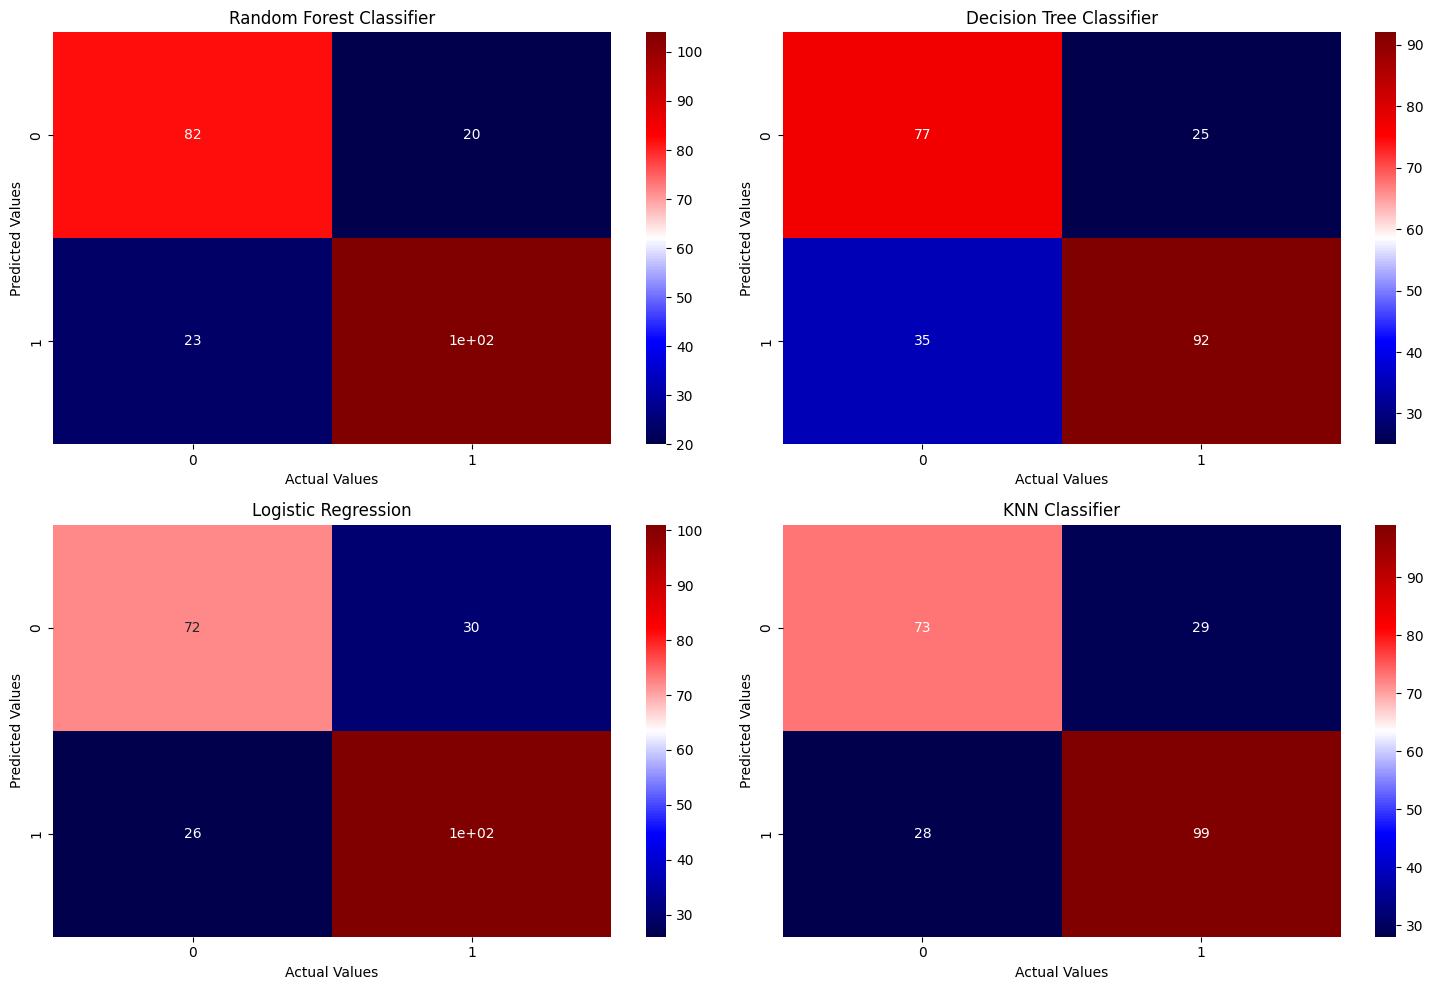

In [121]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='seismic', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='seismic', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lgr_pred), annot=True, cmap='seismic', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='seismic', ax=ax[1,1]).set_title('KNN Classifier')

# Add xlabel adn ylabel
for i in range(2):
    for j in range(2):
        ax[i, j].set_ylabel('Predicted Values')
        ax[i, j].set_xlabel('Actual Values')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Accuracy')

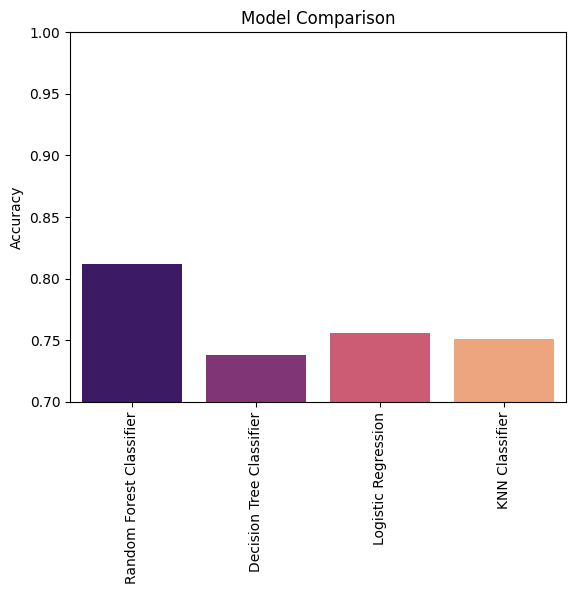

In [122]:
# model comparison
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lgr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylim(0.7, 1.0)
plt.ylabel('Accuracy')

### Conclusion

It can be seen that the random forest classification model has the best performance compared to other models such as logistic regression, decision tree, and knn on the test set with an accuracy of 81.22%. The model can predict wine quality based on the given features with an accuracy of 81.22%.